In [1]:
# Social_Network_Ads.csv

This dataset contains information of users in a social network. Those informations are the user id the gender the age and the estimated salary. A car company has just launched their brand new luxury SUV. And we're trying to see which of these users of the social network are going to buy this brand new SUV And the last column here tells If yes or no the user bought this SUV we are going to build a model that is going to predict if a user is going to buy or not the SUV based on two variables which are going to be the age and the estimated salary. So our matrix of feature is only going to be these two columns. We want to find some correlations between the age and the estimated salary of a user and his decision to purchase yes or no the SUV.


**Step 1 | Data Pre-Processing**

**Importing the Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

**Importing the dataset**

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')
df = df.iloc[:, 2:]

In [4]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
df['Purchased'].unique()

array([0, 1], dtype=int64)

In [6]:
df.shape

(400, 3)

In [7]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(367, 3)

In [10]:
df.describe()

,Age,EstimatedSalary,Purchased
count,367.000000,367.000000,367.000000
mean,37.722071,70719.346049,0.376022
std,10.681383,34772.173908,0.485047
min,18.000000,15000.000000,0.000000
25%,29.500000,43000.000000,0.000000
50%,37.000000,71000.000000,0.000000
75%,46.000000,89000.000000,1.000000
max,60.000000,150000.000000,1.000000


### Outlier

In [11]:
# Age Column
iqr = df['Age'].quantile(0.75) - df['Age'].quantile(0.25)
upper_threshold = df['Age'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['Age'].quantile(0.25) - (1.5 * iqr)
print(lower_threshold)
print(upper_threshold)

4.75
70.75


In [12]:
# EstimatedSalary Column
iqr = df['EstimatedSalary'].quantile(0.75) - df['EstimatedSalary'].quantile(0.25)
upper_threshold = df['EstimatedSalary'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['EstimatedSalary'].quantile(0.25) - (1.5 * iqr)
print(lower_threshold)
print(upper_threshold)

-26000.0
158000.0


There is no outlier in two columns 'Age' and 'EstimatedSalary'.

### EDA

In [13]:
df.corr()

,Age,EstimatedSalary,Purchased
Age,1.000000,0.167771,0.626164
EstimatedSalary,0.167771,1.000000,0.375624
Purchased,0.626164,0.375624,1.000000


Text(0, 0.5, 'EstimatedSalary')

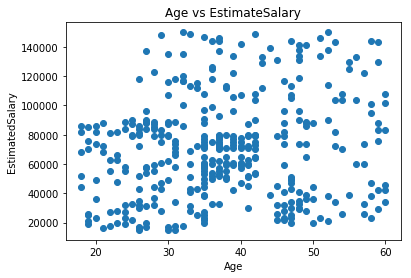

In [14]:
plt.scatter(df['Age'], df['EstimatedSalary'])
plt.title('Age vs EstimateSalary')
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')

There is no Linear relationship between 'Age' and 'EstimatedSalary'. So, we have to use both the columns for the model.

C:\Users\Praveen\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Age')

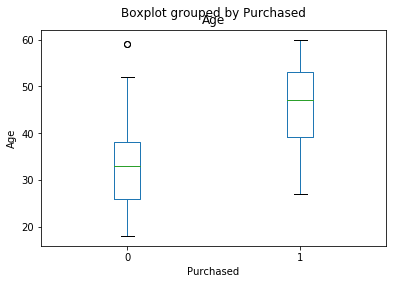

In [15]:
df.boxplot(by='Purchased', column='Age', grid=False)
plt.xlabel('Purchased')
plt.ylabel('Age')

The age group of people bought the SUV is in the approximate range of 27 to 60. And the age group of people didn't bought<br> the SUV is in the approximate range of 20 to 52.

Text(0, 0.5, 'EstimatedSalary')

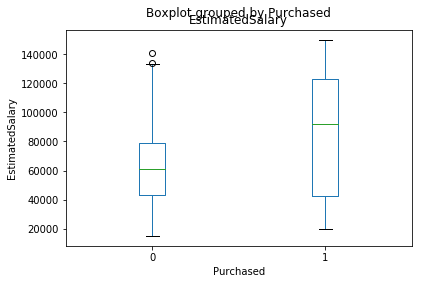

In [16]:
df.boxplot(by='Purchased', column='EstimatedSalary', grid=False)
plt.xlabel('Purchased')
plt.ylabel('EstimatedSalary')

By the analysis we can see that the SUV is bought more in the approximate range of 40000 to 120000. And not bought in the<br>
range 42000 to 78000.

In [17]:
# Seperating as Features and Target
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

**Splitting the dataset into the Training set and Test set**

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [19]:
print(X_train)

[[    37  70000]
 [    28  84000]
 [    35  91000]
 [    45  22000]
 [    44  39000]
 [    28  59000]
 [    37  71000]
 [    30  79000]
 [    32 117000]
 [    47  49000]
 [    32 120000]
 [    24  55000]
 [    36  52000]
 [    21  16000]
 [    35  75000]
 [    47  23000]
 [    39 134000]
 [    23  28000]
 [    57 122000]
 [    37  53000]
 [    26  17000]
 [    35  88000]
 [    39  59000]
 [    46  82000]
 [    36  33000]
 [    37 146000]
 [    32 135000]
 [    20  74000]
 [    35  58000]
 [    43 133000]
 [    18  44000]
 [    31  89000]
 [    58  38000]
 [    48  96000]
 [    56  60000]
 [    41  80000]
 [    39 106000]
 [    27  20000]
 [    25  33000]
 [    49  28000]
 [    24  27000]
 [    26  30000]
 [    46  28000]
 [    48  33000]
 [    31  74000]
 [    28  79000]
 [    59 143000]
 [    19  19000]
 [    49  89000]
 [    60 108000]
 [    27  84000]
 [    57  26000]
 [    35  65000]
 [    50  20000]
 [    47 107000]
 [    38  55000]
 [    48  30000]
 [    46  79000]
 [    41  6000

In [20]:
print(y_train)

[1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1
 0 0 1 0 0 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0
 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 0 1
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1
 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1
 1 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0
 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1
 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0]


In [21]:
print(X_test)

[[    53  72000]
 [    35  47000]
 [    27  17000]
 [    42  80000]
 [    41  79000]
 [    23  66000]
 [    51 146000]
 [    27  88000]
 [    22  55000]
 [    50  44000]
 [    27  31000]
 [    42 108000]
 [    55  39000]
 [    36 125000]
 [    38 112000]
 [    37 137000]
 [    22  27000]
 [    55 125000]
 [    18  52000]
 [    41  71000]
 [    49  65000]
 [    48 131000]
 [    26  80000]
 [    49  36000]
 [    26  35000]
 [    31  76000]
 [    40  47000]
 [    35  57000]
 [    57  60000]
 [    59 130000]
 [    37  74000]
 [    27  90000]
 [    20  23000]
 [    42  79000]
 [    49  39000]
 [    60  42000]
 [    31  18000]
 [    25  90000]
 [    33 113000]
 [    35 108000]
 [    36 118000]
 [    57  74000]
 [    29  80000]
 [    42  54000]
 [    23  48000]
 [    41  52000]
 [    49  86000]
 [    35  97000]
 [    39  75000]
 [    36  75000]
 [    34 115000]
 [    37  78000]
 [    36  50000]
 [    35  73000]
 [    29 148000]
 [    29  75000]
 [    19  26000]
 [    37  52000]
 [    21  8800

In [22]:
print(y_test)

[1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0
 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1
 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0]


**Feature Scaling**

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Step 2 | Logistic Regression Model**

The library for this job which is going to be the linear model library and it is called linear because the logistic regression is a linear classifier which means that here since we're in two dimensions, our two categories of users are going to be separated by a straight line. Then import the logistic regression class. Next we will create a new object from this class which is going to be our classifier that we are going to fit on our training set.

**Fitting Logistic Regression to the Training set**

In [24]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [25]:
print(X_train)

[[-0.05394973  0.0067336 ]
 [-0.88330124  0.41823137]
 [-0.23825007  0.62398026]
 [ 0.6832516  -1.40411591]
 [ 0.59110144 -0.90444004]
 [-0.88330124 -0.31658608]
 [-0.05394973  0.0361263 ]
 [-0.6990009   0.27126788]
 [-0.51470057  1.38819041]
 [ 0.86755194 -0.61051306]
 [-0.51470057  1.47636851]
 [-1.25190191 -0.43415687]
 [-0.1460999  -0.52233497]
 [-1.52835241 -1.5804721 ]
 [-0.23825007  0.15369709]
 [ 0.86755194 -1.37472321]
 [ 0.1303506   1.88786628]
 [-1.34405207 -1.22775972]
 [ 1.78905361  1.5351539 ]
 [-0.05394973 -0.49294227]
 [-1.06760157 -1.5510794 ]
 [-0.23825007  0.53580217]
 [ 0.1303506  -0.31658608]
 [ 0.77540177  0.35944598]
 [-0.1460999  -1.08079623]
 [-0.05394973  2.24057866]
 [-0.51470057  1.91725898]
 [-1.62050258  0.12430439]
 [-0.23825007 -0.34597878]
 [ 0.49895127  1.85847358]
 [-1.80480291 -0.75747655]
 [-0.60685074  0.56519486]
 [ 1.88120378 -0.93383274]
 [ 0.9597021   0.77094375]
 [ 1.69690344 -0.28719338]
 [ 0.31465093  0.30066058]
 [ 0.1303506   1.06487073]
 

In [26]:
print(X_test)

[[ 1.42045294  0.065519  ]
 [-0.23825007 -0.66929846]
 [-0.97545141 -1.5510794 ]
 [ 0.4068011   0.30066058]
 [ 0.31465093  0.27126788]
 [-1.34405207 -0.11083719]
 [ 1.23615261  2.24057866]
 [-0.97545141  0.53580217]
 [-1.43620224 -0.43415687]
 [ 1.14400244 -0.75747655]
 [-0.97545141 -1.13958163]
 [ 0.4068011   1.12365613]
 [ 1.60475327 -0.90444004]
 [-0.1460999   1.623332  ]
 [ 0.03820043  1.24122692]
 [-0.05394973  1.97604437]
 [-1.43620224 -1.25715242]
 [ 1.60475327  1.623332  ]
 [-1.80480291 -0.52233497]
 [ 0.31465093  0.0361263 ]
 [ 1.05185227 -0.14022989]
 [ 0.9597021   1.79968819]
 [-1.06760157  0.30066058]
 [ 1.05185227 -0.99261814]
 [-1.06760157 -1.02201083]
 [-0.60685074  0.18308979]
 [ 0.22250077 -0.66929846]
 [-0.23825007 -0.37537148]
 [ 1.78905361 -0.28719338]
 [ 1.97335394  1.77029549]
 [-0.05394973  0.12430439]
 [-0.97545141  0.59458756]
 [-1.62050258 -1.37472321]
 [ 0.4068011   0.27126788]
 [ 1.05185227 -0.90444004]
 [ 2.06550411 -0.81626195]
 [-0.60685074 -1.5216867 ]
 

**Step 3 | Prediction**

In [27]:
# Predicting a new result
print(classifier.predict(sc.transform([[22, 75520]])))

[0]


In [28]:
# Predicting test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]]


**Step 4 | Evaluating The Predection**

We predicted the test results and now we will evaluate if our logistic regression model learned and understood correctly. So this confusion matrix is going to contain the correct predictions that our model made on the set as well as the incorrect predictions.

**Making the Confusion Matrix**

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[48  9]
 [ 7 28]]


**Visualization**

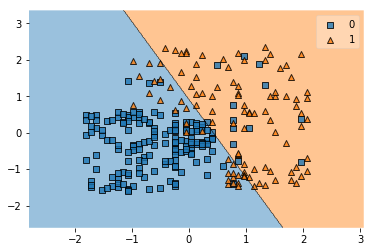

In [30]:
plot_decision_regions(X_train, y_train, clf=classifier, legend=1)

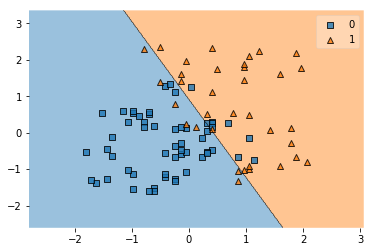

In [31]:
plot_decision_regions(X_test, y_test, clf=classifier, legend=1)